32

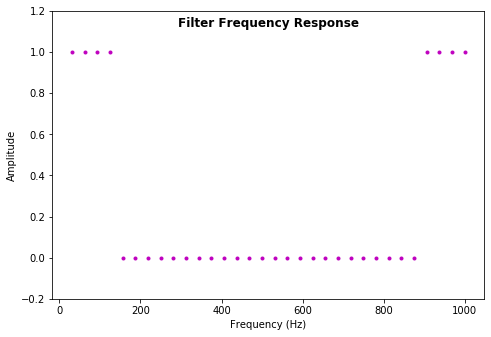

In [1]:
#FIR Filter experiments

import math
import cmath
import numpy
import scipy
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

fs = 1000  #sample frequency
N = 32  #number of samples in DFT
fmax = fs/2  #max unaliased frequency
bins = fs/N  #size of DFT frequency bins
fc = 100  #filter cutoff frequency

#construct FIR filter sequence
numbins = fc/bins
waveform = []
waveaxis = []
i = 0
while i < N/2:
    if i < numbins:
        waveform.append(1)
    else:
        waveform.append(0)
    i += 1
    waveaxis.append(bins*i)
if (N/2 % 2) == 0:
    k = N/2 + 1
else:
    k = N/2
i = 1
j = len(waveform)
while i < k:
    waveform.append(waveform[j - i])
    waveaxis.append((j)*bins+bins*i)
    i += 1


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(waveaxis,waveform,'m.')

fig.suptitle('Filter Frequency Response', fontweight='bold') 
ax.set_xlabel('Frequency (Hz)') 
ax.set_ylabel('Amplitude')
ax.set_ylim(-.2,1.2)
len(waveform)

C:\Users\Steven\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-0.2, 1.2)

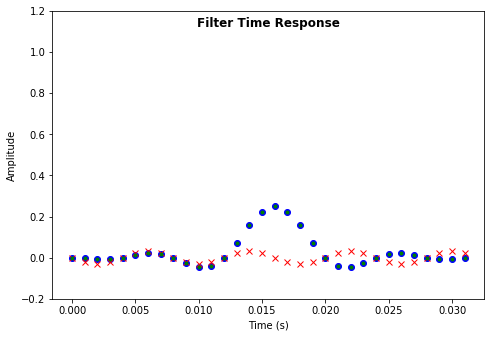

In [2]:
# Ok, next step is to take inverse DFT of filter to get time domain version

timewave = []
timewave = list(scipy.ifft(waveform))

ts = 1/fs  #sample length in time(s)
i = 0
timeaxis = []
while i < len(timewave):
    timeaxis.append(i*ts)
    i += 1

i = 0
while i < len(timewave)/2:
    timewave.append(timewave.pop(0))
    i += 1
    
realwave = []
imagwave = []
i = 0
while i < len(timewave):
    realwave.append(timewave[i].real)
    imagwave.append(timewave[i].imag)
    i += 1

    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(timeaxis,realwave,'bo')
ax.plot(timeaxis,imagwave,'rx')
ax.plot(timeaxis,timewave,'g.')

fig.suptitle('Filter Time Response', fontweight='bold') 
ax.set_xlabel('Time (s)') 
ax.set_ylabel('Amplitude')
ax.set_ylim(-.2,1.2)

(-0.2, 1.2)

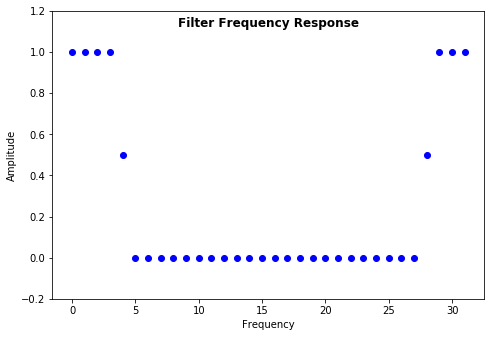

In [3]:
#hmm, lets check this, it seems fishy to use only real coefficients
freqwave = []
freqwave = list(scipy.fft(realwave))

magwave = []
freqaxis = []
i = 0
while i < len(freqwave):
    magwave.append((freqwave[i].real**2+freqwave[i].imag**2)**.5)
    freqaxis.append(i)
    i += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(freqaxis,magwave,'bo')

fig.suptitle('Filter Frequency Response', fontweight='bold') 
ax.set_xlabel('Frequency') 
ax.set_ylabel('Amplitude')
ax.set_ylim(-.2,1.2)

Text(0, 0.5, 'Amplitude')

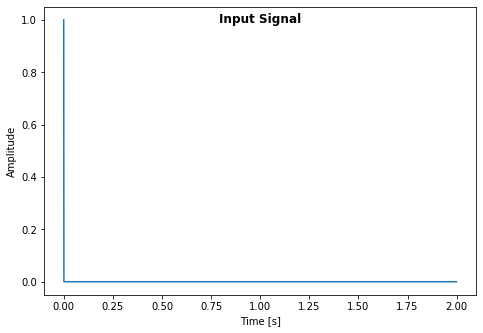

In [4]:
#Ok, seems to work ok.  Lets try filtering a signal with it.

m = 0
signal = []
while m < 2000:
    #signal.append((math.sin(2*math.pi*800/fsamp*m))+(math.sin(2*math.pi*1600/fsamp*m))+(math.sin(2*math.pi*2400/fsamp*m))+(math.sin(2*math.pi*3200/fsamp*m))+(math.sin(2*math.pi*4000/fsamp*m)))
    #signal.append(math.sin(2*math.pi*150/fs*m))
    signal.append(0)
    m += 1
signalaxis = []
m = 0
while m < len(signal):
    signalaxis.append(m/fs)
    m += 1

signal[0] = 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(signalaxis,signal)

fig.suptitle('Input Signal', fontweight='bold') 
ax.set_xlabel('Time [s]') 
ax.set_ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

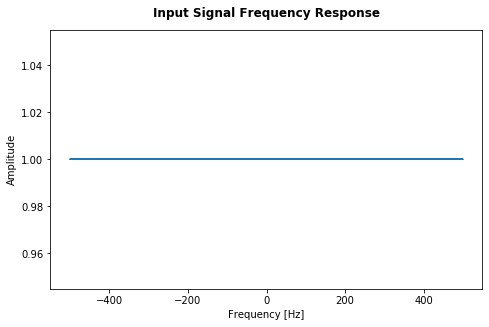

In [5]:
#Frequency response of input signal

wavefreq = abs(scipy.fft(signal))
freqaxis = []

freqaxis = list(numpy.fft.fftfreq(len(signal), d=1/fs))

fig.clear()
fig = plt.figure()
ax = fig.add_axes([0,0,1,.9])
ax.plot(freqaxis,wavefreq)

fig.suptitle('Input Signal Frequency Response', fontweight='bold') 
ax.set_xlabel('Frequency [Hz]') 
ax.set_ylabel('Amplitude') 

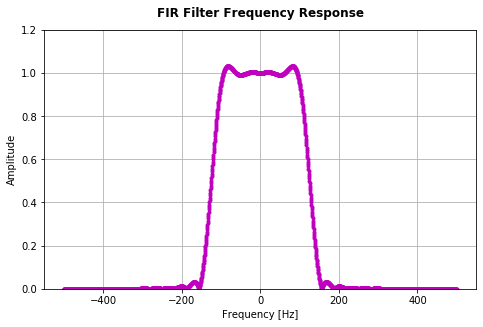

In [6]:
#Implement the filter

delayvalues = [0]*N
output = []
i = 0
while i < len(signal):
    j = 0
    sumval = 0
    delayvalues[0] = signal[i]
    while j < len(delayvalues):
        sumval = sumval + delayvalues[j]*realwave[j]
        j += 1
    j = 0
    output.append(sumval)
    while j < (len(delayvalues)-1):
        delayvalues[len(delayvalues)-1-j] = delayvalues[len(delayvalues)-2-j]
        j += 1
    i += 1    

#convert to frequency and graph
wavefreq = list((abs(scipy.fft(output))))
freqaxis = []

freqaxis = list(numpy.fft.fftfreq(len(wavefreq), d=1/fs))

fig.clear()
fig = plt.figure()
ax = fig.add_axes([0,0,1,.9])
ax.plot(freqaxis,wavefreq,'m.')

fig.suptitle('FIR Filter Frequency Response', fontweight='bold') 
ax.set_xlabel('Frequency [Hz]') 
ax.set_ylabel('Amplitude') 
ax.set_ylim(0,1.2)
ax.grid()

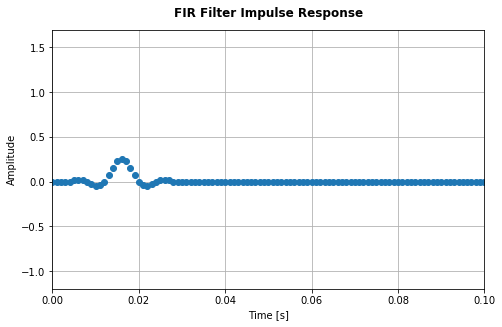

In [7]:
#Time domain plot
timeaxis = list(range(len(output)))
timeaxis = [i/fs for i in timeaxis]
fig.clear()
fig = plt.figure()
ax = fig.add_axes([0,0,1,.9])
ax.plot(timeaxis,output,'o')


fig.suptitle('FIR Filter Impulse Response', fontweight='bold') 
ax.set_xlabel('Time [s]') 
ax.set_ylabel('Amplitude') 
ax.set_ylim(-1.2,1.7)
ax.set_xlim(0,.1)
ax.grid()

C:\Users\Steven\Anaconda3\lib\site-packages\ipykernel_launcher.py:102: RuntimeWarning: divide by zero encountered in log10


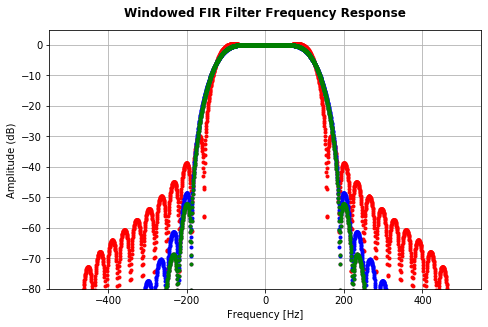

In [8]:
#Ok, lets now try adding various windows to the filter 

hamming = []
hanning = []
blackman = []

i = 0
while i < N:
    hamming.append(.54-.46*math.cos(2*math.pi*i/(N-1)))
    hanning.append(.5-.5*math.cos(2*math.pi*i/(N-1)))
    blackman.append(.42-.5*math.cos(2*math.pi*i/(N-1))+.08*math.cos(2*math.pi*i/(N-1)))
    i += 1
    

    
#Now inverse FFT      
timewaveham = []
timewavehan = []
timewaveblack = []
timewaveham = list(scipy.ifft(waveform))
timewavehan = list(scipy.ifft(waveform))
timewaveblack = list(scipy.ifft(waveform))



ts = 1/fs  #sample length in time(s)
i = 0
timeaxis = []
while i < len(timewaveham):
    timeaxis.append(i*ts)
    i += 1

i = 0
while i < len(timewaveham)/2:
    timewaveham.append(timewaveham.pop(0))
    timewavehan.append(timewavehan.pop(0))
    timewaveblack.append(timewaveblack.pop(0))
    i += 1

#now create new filter waveforms
waveformham = []
waveformhan = []
waveformblack = []
    
i = 0
while i < N:
    waveformham.append(timewaveham[i]*hamming[i])
    waveformhan.append(hanning[i]*timewavehan[i])
    waveformblack.append(blackman[i]*timewaveblack[i])
    i += 1    
    
    
realwaveham = []
realwavehan = []
realwaveblack = []
i = 0
while i < len(timewaveham):
    realwaveham.append(waveformham[i].real)
    realwavehan.append(waveformhan[i].real)
    realwaveblack.append(waveformblack[i].real)
    i += 1    
    
    
#Now filter
    
delayvaluesham = [0]*N
delayvalueshan = [0]*N
delayvaluesblack = [0]*N
outputham = []
outputhan = []
outputblack = []
i = 0
while i < len(signal):
    j = 0
    sumvalham = 0
    sumvalhan = 0
    sumvalblack = 0
    delayvaluesham[0] = signal[i]
    delayvalueshan[0] = signal[i]
    delayvaluesblack[0] = signal[i]
    while j < len(delayvaluesham):
        sumvalham = sumvalham + delayvaluesham[j]*realwaveham[j]
        sumvalhan = sumvalhan + delayvalueshan[j]*realwavehan[j]
        sumvalblack = sumvalblack + delayvaluesblack[j]*realwaveblack[j]
        j += 1
    j = 0
    outputham.append(sumvalham)
    outputhan.append(sumvalhan)
    outputblack.append(sumvalblack)
    while j < (len(delayvaluesham)-1):
        delayvaluesham[len(delayvaluesham)-1-j] = delayvaluesham[len(delayvaluesham)-2-j]
        delayvalueshan[len(delayvalueshan)-1-j] = delayvalueshan[len(delayvalueshan)-2-j]
        delayvaluesblack[len(delayvaluesblack)-1-j] = delayvaluesblack[len(delayvaluesblack)-2-j]
        j += 1
    i += 1    

#convert to frequency and graph
wavefreqham = list((abs(scipy.fft(outputham))))
wavefreqhan = list((abs(scipy.fft(outputhan))))
wavefreqblack = list((abs(scipy.fft(outputblack))))

wavefreq = [numpy.log10(i) * 20 for i in wavefreq]
wavefreqham = [numpy.log10(i) * 20 for i in wavefreqham]
wavefreqhan = [numpy.log10(i) * 20 for i in wavefreqhan]
wavefreqblack = [numpy.log10(i) * 20 for i in wavefreqblack]

freqaxis = []

freqaxis = list(numpy.fft.fftfreq(len(wavefreqham), d=1/fs))

fig.clear()
fig = plt.figure()
ax = fig.add_axes([0,0,1,.9])
ax.plot(freqaxis,wavefreq,'r.')
ax.plot(freqaxis,wavefreqham,'m.')
ax.plot(freqaxis,wavefreqhan,'b.')
ax.plot(freqaxis,wavefreqham,'g.')

fig.suptitle('Windowed FIR Filter Frequency Response', fontweight='bold') 
ax.set_xlabel('Frequency [Hz]') 
ax.set_ylabel('Amplitude (dB)') 
ax.set_ylim(-80,5)
ax.grid()


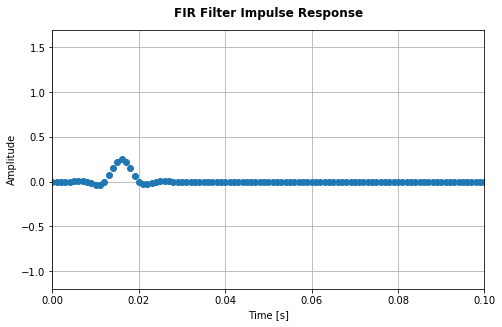

In [9]:
#Time domain plot
timeaxis = list(range(len(outputham)))
timeaxis = [i/fs for i in timeaxis]
fig.clear()
fig = plt.figure()
ax = fig.add_axes([0,0,1,.9])
ax.plot(timeaxis,outputham,'o')


fig.suptitle('FIR Filter Impulse Response', fontweight='bold') 
ax.set_xlabel('Time [s]') 
ax.set_ylabel('Amplitude') 
ax.set_ylim(-1.2,1.7)
ax.set_xlim(0,.1)
ax.grid()

(-0.2, 1.2)

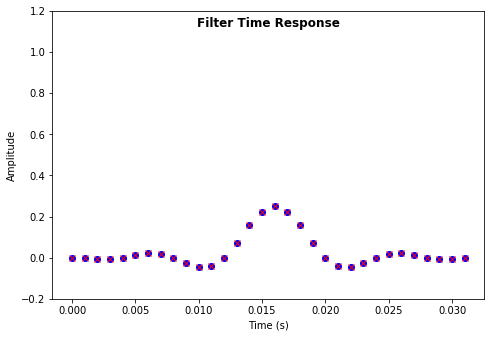

In [10]:
#Now implement idft without built in functions

i = 0
dftwaveform = []
while i < N:
    dftwaveform.append(waveform[i]/(N))
    i += 1
    
#dftwaveform[0] = dftwaveform[0]/2
#dftwaveform[N-1] = dftwaveform[N-1]/2

i = 0
j = 0
dfttimewave = []
while i < N:
    dfttimewave.append(0)
    j = 0
    while j < N:
        dfttimewave[i] += dftwaveform[j]*math.cos(2*math.pi*j*i/N)
        j += 1
    i += 1

i = 0
while i < len(dfttimewave)/2:
    dfttimewave.append(dfttimewave.pop(0))
    i += 1
    
timeaxis = list(range(len(dfttimewave)))
timeaxis = [i/fs for i in timeaxis]
fig.clear()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(timeaxis,dfttimewave,'bo')
ax.plot(timeaxis,realwave,'rx')

fig.suptitle('Filter Time Response', fontweight='bold') 
ax.set_xlabel('Time (s)') 
ax.set_ylabel('Amplitude')
ax.set_ylim(-.2,1.2)

(-0.2, 1.2)

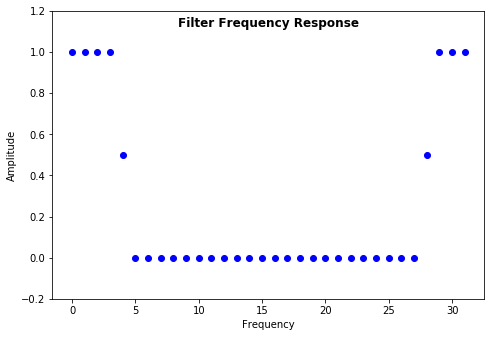

In [11]:
#hmm, lets check this, it seems too large
freqwave = []
freqwave = list(scipy.fft(dfttimewave))

magwave = []
freqaxis = []
i = 0
while i < len(freqwave):
    magwave.append((freqwave[i].real**2+freqwave[i].imag**2)**.5)
    freqaxis.append(i)
    i += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(freqaxis,magwave,'bo')

fig.suptitle('Filter Frequency Response', fontweight='bold') 
ax.set_xlabel('Frequency') 
ax.set_ylabel('Amplitude')
ax.set_ylim(-.2,1.2)